In [1]:
import pandas as pd
returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                     header = 0, index_col = 0, parse_dates = True, na_values = -99.99
                     )

In [2]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [11]:
columns = ['Lo 20', 'Hi 20']
returns = returns[columns]
returns = returns / 100
returns.head()

,Lo 20,Hi 20
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


<AxesSubplot:>

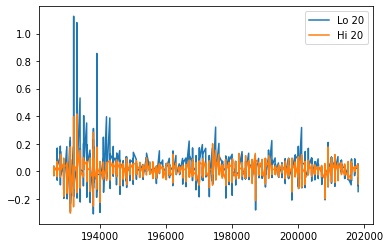

In [12]:
n_month = returns.shape[0]
returns.plot.line()

In [14]:
annualized_returns_qn = (returns + 1).prod() ** (12/n_month) - 1

In [15]:
annualized_returns_qn

Lo 20    0.151977
Hi 20    0.098490
dtype: float64

In [16]:
import numpy as np
annualized_volatility = returns.std()*np.sqrt(12)
annualized_volatility

Lo 20    0.336701
Hi 20    0.195116
dtype: float64

In [17]:
returns.index = pd.to_datetime(returns.index, format="%Y%m")
returns.head()

,Lo 20,Hi 20
1926-07-01,-0.0057,0.0333
1926-08-01,0.0384,0.0233
1926-09-01,-0.0048,-0.0009
1926-10-01,-0.0329,-0.0295
1926-11-01,-0.0055,0.0316


In [18]:
returns.index = returns.index.to_period('M')
returns.head()

,Lo 20,Hi 20
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


<AxesSubplot:>

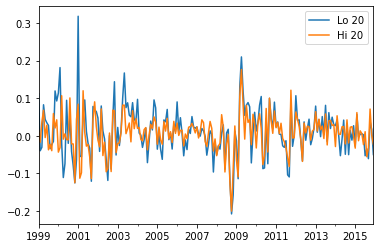

In [19]:
returns["1999":"2015"].plot.line()

In [20]:
annualized_returns = (returns["1999":"2015"] + 1).prod() ** (12/n_month) - 1
annualized_returns

Lo 20    0.020111
Hi 20    0.011268
dtype: float64

<AxesSubplot:>

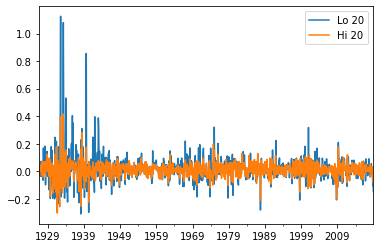

In [21]:
returns.plot.line()

In [22]:
annualized_vol = returns["1999":"2015"].std()*np.sqrt(12)
annualized_vol

Lo 20    0.228894
Hi 20    0.172713
dtype: float64

<AxesSubplot:>

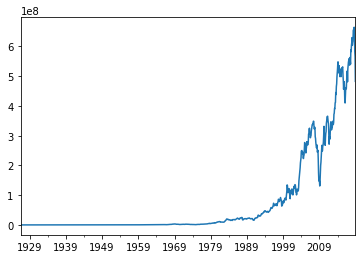

In [24]:
wealth_index = 1000*(1+returns["Lo 20"]).cumprod()
wealth_index.plot.line()

<AxesSubplot:>

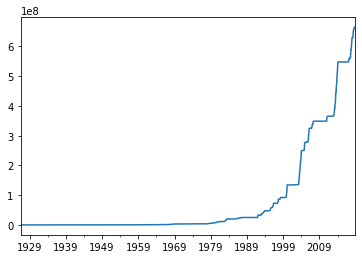

In [25]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot.line()

<AxesSubplot:>

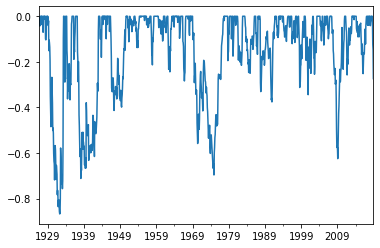

In [26]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot.line()

In [32]:
drawdown["1999":"2015"].min()

TypeError: 'function' object is not subscriptable

In [33]:
def drawdownf(return_series: pd.Series): 
    """
    Takes a times series of asset returns
    Computes and returns a Dataframe that contains:
    the wealth index
    the previous peaks
    percent drawdowns
    """
    wealth_index = 1000 * (1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks":  previous_peaks,
        "Drawdown": drawdowns
    })

<AxesSubplot:>

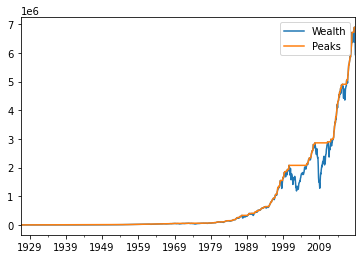

In [39]:
drawdownf(returns["Hi 20"])[["Wealth","Peaks"]].plot()

In [40]:
drawdownf(returns["1999":"2015"]["Hi 20"])["Drawdown"].min()

-0.5527349978713653

In [41]:
drawdownf(returns["1999":"2015"]["Hi 20"])["Drawdown"].idxmin()

Period('2009-02', 'M')

<AxesSubplot:>

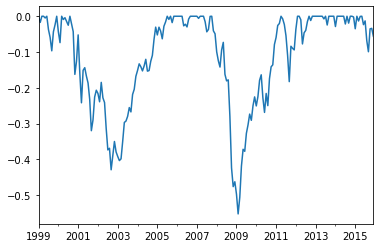

In [42]:
drawdownf(returns["1999":"2015"]["Hi 20"])["Drawdown"].plot()